# Exercise 3.5 (Bonus)- DCT & Wavelet Transform

For any questions regarding this assignment please refer to the course forum on the moodle web site, for personal questions please email alonfi@post.bgu.ac.il



# 1. Load the dataset from google drive

First, the notebook needs to gain access to your drive.

Run the next code:

In [24]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Next:

1.   Update the directory path to your google drive directory

2.   Run the code. If it worked properly, you should be able to see the 'beatles.png' image.

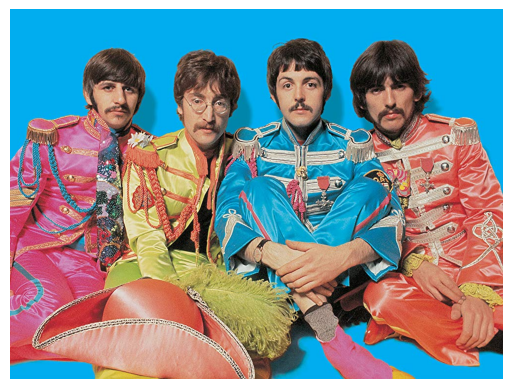

In [25]:
import os
import cv2
import matplotlib.pyplot as plt

directory = "/content/gdrive/My Drive/HW3.5/"  # Enter the path to your Google Drive directory
os.chdir(directory)

# Load the image
image = cv2.imread('beatles.png')

# Convert the image from BGR to RGB format for proper color display in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axes
plt.show()


# 2. Discrete Cosine Transform
In this question we will learn the tools for 2D Discrete Cosine Transform (DCT).

1. Read the 'beatles.png' image accompanied to this assignment, and convert it to grayscale normalized
image. Randomly crop a 128x128 patch from the image and present it. Make sure the patch isn't monotone (for example- the patch can't contain just the background). Show the patch.

Note: For the start you can try and use the `random` function for getting the initial patch but then switch the location of the patch to hard values for consistency.

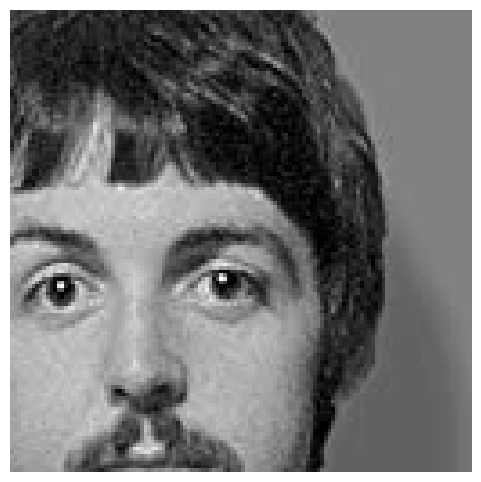

In [33]:
import random
import numpy as np

image = cv2.imread('beatles.png', cv2.IMREAD_GRAYSCALE)
image_normalized = image / 255.0    #normalize
h, w = image.shape
x, y = -1, -1
patch = None
for i in range(h*w):        #looking for a random place in the picture that is not boring by using random until we find a good patch
    x = random.randint(0, w - 128)
    y = random.randint(0, h - 128)
    patch = image[y:y + 128, x:x + 128]
    if np.std(patch) > 0.05:        #this allows us to know if we have a good patch or we need to keep going
        break
if x == -1 or y == -1:        #it is very possible that we wont find a good patch
    raise ValueError("Could not find patch")

plt.figure(figsize=(6, 6))
plt.imshow(patch, cmap='gray')
plt.axis('off')
plt.show()

2. Use the function `cv2.dct(np.float32(patch))` on the image.
Display the result using `plt.imshow(np.log(np.abs(dct)), cmap='jet') `
, `plt.colorbar()`




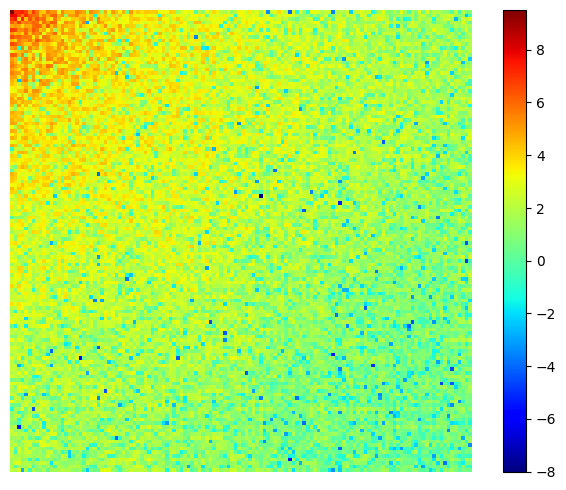

In [34]:
dct = cv2.dct(np.float32(patch))
plt.figure(figsize=(8, 6))
plt.imshow(np.log(np.abs(dct)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

3. Set to zero the DCT 50% lowest absolute values and apply the IDCT on the result. Display the
obtained result from the IDCT side by side to the original. Explain the result.

Explanation: We can see that even though we removed some of the information in this picture (alot of information) we still can barely see any diffrences between the 2 pictures (just as we saw in class) this is why this is a good tool for compression.

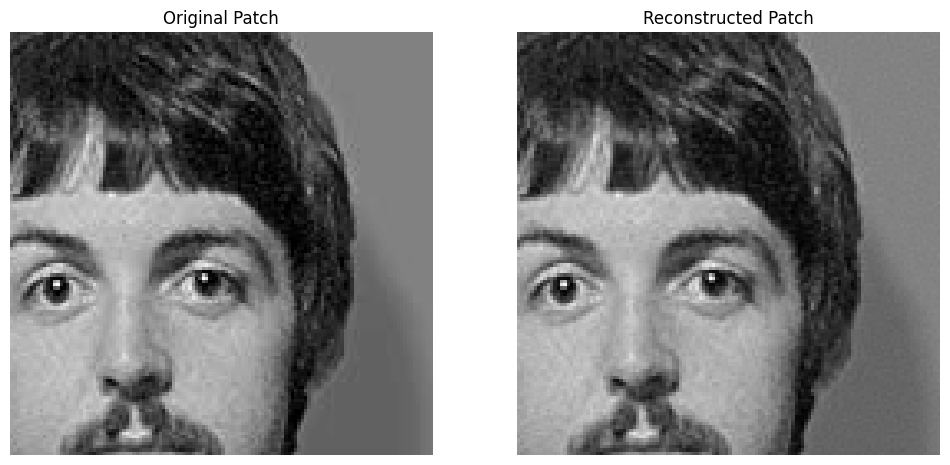

In [35]:
dct_copy = dct.copy() #copy so we wont destroy the original
dct_flattened = np.abs(dct_copy).flatten()   #working with an array
threshold = np.percentile(dct_flattened, 50)      #finding the threshold that will tell us which values to change to 0 and which to keep
dct_copy[np.abs(dct_copy) < threshold] = 0      #zeroing out those under the threshold
idct_result = cv2.idct(dct_copy)   #inversing to go back to the main image (with the loss of data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(patch, cmap='gray')
plt.title("Original Patch")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(idct_result, cmap='gray')
plt.title("Reconstructed Patch")
plt.axis('off')

plt.show()


4. Repeat section 3 but set to zero 30/50/70 percent of the DCT lowest absolute values and apply the IDCT. Plot all the results along with the original patch. Explain the results.  

Explaination: When 30% of the DCT coefficients are removed, the image still looks very similar to the original, with only slight smoothing. At 50%, some details are lost. When 70% are removed, most fine details are gone (even though in our images we can barely see the diffrence). but in theory this shows that removing more DCT coefficients reduces image quality (even though its hard to see) but increases compression.

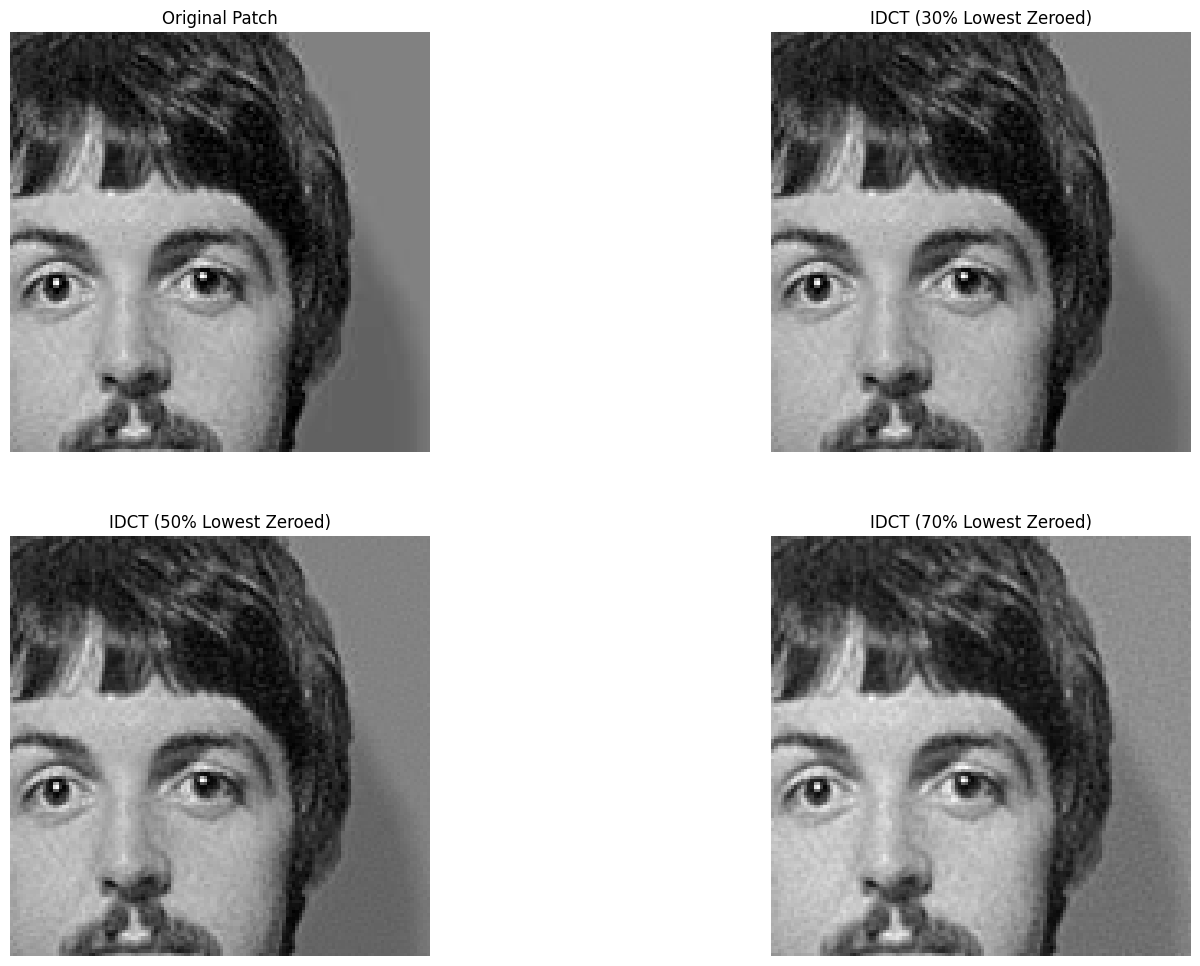

In [36]:
def reconstruct_with_threshold(dct, percentage):    #we will do the same as the last section but to 3 images so its easier to constract a function
    dct_copy = dct.copy()                               #copy so we wont destroy the original
    dct_flattened = np.abs(dct_copy).flatten()              #array is easier for computation
    threshold = np.percentile(dct_flattened, percentage)    #finding the threshold as before
    dct_copy[np.abs(dct_copy) < threshold] = 0              #zeroing out those under the threshold
    return cv2.idct(dct_copy)                           #inversing to go back to the main image (with the loss of data) and returning it


reconstructed_30 = reconstruct_with_threshold(dct, 30)
reconstructed_50 = reconstruct_with_threshold(dct, 50)
reconstructed_70 = reconstruct_with_threshold(dct, 70)

plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
plt.imshow(patch, cmap='gray')
plt.title("Original Patch")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(reconstructed_30, cmap='gray')
plt.title("IDCT (30% Lowest Zeroed)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(reconstructed_50, cmap='gray')
plt.title("IDCT (50% Lowest Zeroed)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(reconstructed_70, cmap='gray')
plt.title("IDCT (70% Lowest Zeroed)")
plt.axis('off')

plt.show()


5. Define PSNR and write its mathematical formula.

 PSNR is a metric used to measure the quality of a compressed image compared to the original image. It quantifies how much noise is present in the reconstructed image. Higher PSNR values indicating better quality and lower distortion. The formula uses MSE which we have seen before in previous exercises.

 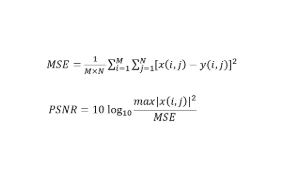

6. Calculate the PSNR of the reconstructed images from section 4 in relation to the original patch. Explain the results.

Explanation: We can see that for 30% zeros we can retrive most of the information therefor we get the highest PSNR. for the 50% zero we should get a decline. For the 70% we can see we get the lowest PSNR as we lose the most information and it is starting to be noticeable.

In [37]:
def calculate_psnr(original, reconstructed):    #we will calculate the PSNR as writen in the formula above
    mse = np.mean((original - reconstructed) ** 2)
    max_pixel = 1.0  # since the image is normalized to [0, 1]
    psnr = 10 * np.log10(max_pixel ** 2 / mse)
    return psnr


psnr_30 = calculate_psnr(patch, reconstructed_30)
psnr_50 = calculate_psnr(patch, reconstructed_50)
psnr_70 = calculate_psnr(patch, reconstructed_70)

print(f"PSNR for 30%: {psnr_30:.2f}")
print(f"PSNR for 50%: {psnr_50:.2f}")
print(f"PSNR for 70%: {psnr_70:.2f}")


PSNR for 30%: 0.32
PSNR for 50%: -7.15
PSNR for 70%: -13.16


# 3. Wavelet Tranform
In this question we will learn the tools for 2D Wavelet Decompostion.

Note: You need to intall the PyWavelets package. Run the next code before continuing:

In [5]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.9 MB/s eta 0:00:00


1. Read the 'beetle.jpg' image, convert it into grayscale image and
normalize to [0, 1]. Plot the image.

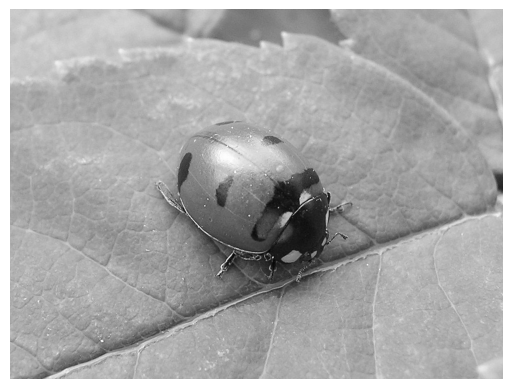

In [26]:
image = cv2.imread('beetle.jpg', cv2.IMREAD_GRAYSCALE)
image_normalized = image / 255.0    #normalize

plt.imshow(image_normalized, cmap='gray')
plt.axis('off')
plt.show()

2. Extract the wavelet decomposition using `pywt.wavedec2()` function: use the
’haar’ wavelet,
you may choose any level of decomposition between 3-5. Explain the output of the function, its shape, type and what it represents.

The output of pywt.wavedec2() is a list containing the wavelet decomposition coefficients of a 2D image. The first element in the list is the approximation coefficients representing the low frequency components at the coarsest level. The other elements are tuples containing detail coefficients (horizontal, vertical, and diagonal) representing the high frequency components at each decomposition level. Each coefficients shape reduces by half in both dimensions at every level due to downsampling and the coefficients are stored as NumPy arrays of type float64. This decomposition separates the image into components of different resolutions and orientations.



In [27]:
import pywt
import numpy as np

coeffs = pywt.wavedec2(image_normalized, wavelet='haar', level=3)   #perform wavelet decomposition
approx_coeffs = coeffs[0]   #low frequency
detail_coeffs = coeffs[1:]  #higher frequencies at different levels

3. Use the `pywt.wavedec2()` function to find the detail and approximation coefficients
for each level.

Note: make sure there are different approximation coefficients for each level. Think how to do it.

In [28]:
levels = 3
approximation_coeffs = []
detail_coeffs = []
current_image = image_normalized

for level in range(levels):
    coeffs = pywt.wavedec2(data=current_image, wavelet='haar', level=1)   #we do the function for the image (which will change) on the first level each time
    A = coeffs[0]   #save the approx
    D = coeffs[1]   #save the coeff (first level so there is only one tuple)
    approximation_coeffs.append(A)    #add them to their lists
    detail_coeffs.append(D)
    current_image = A   #update the image

4. Display the results.

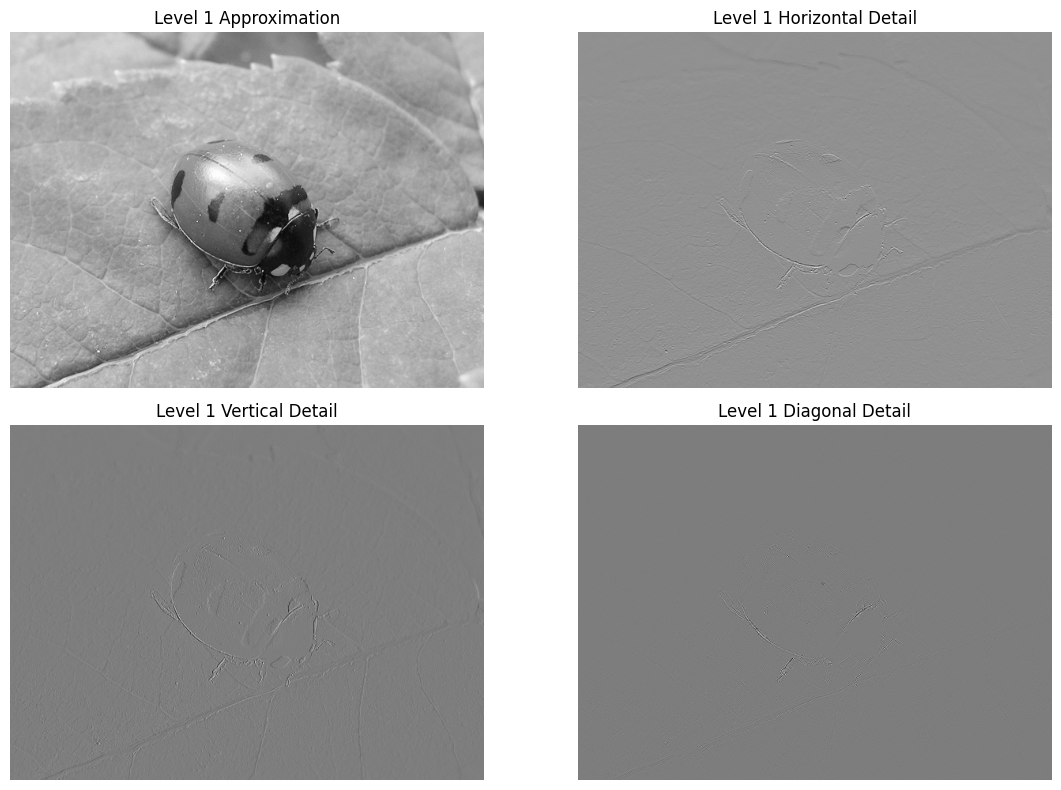

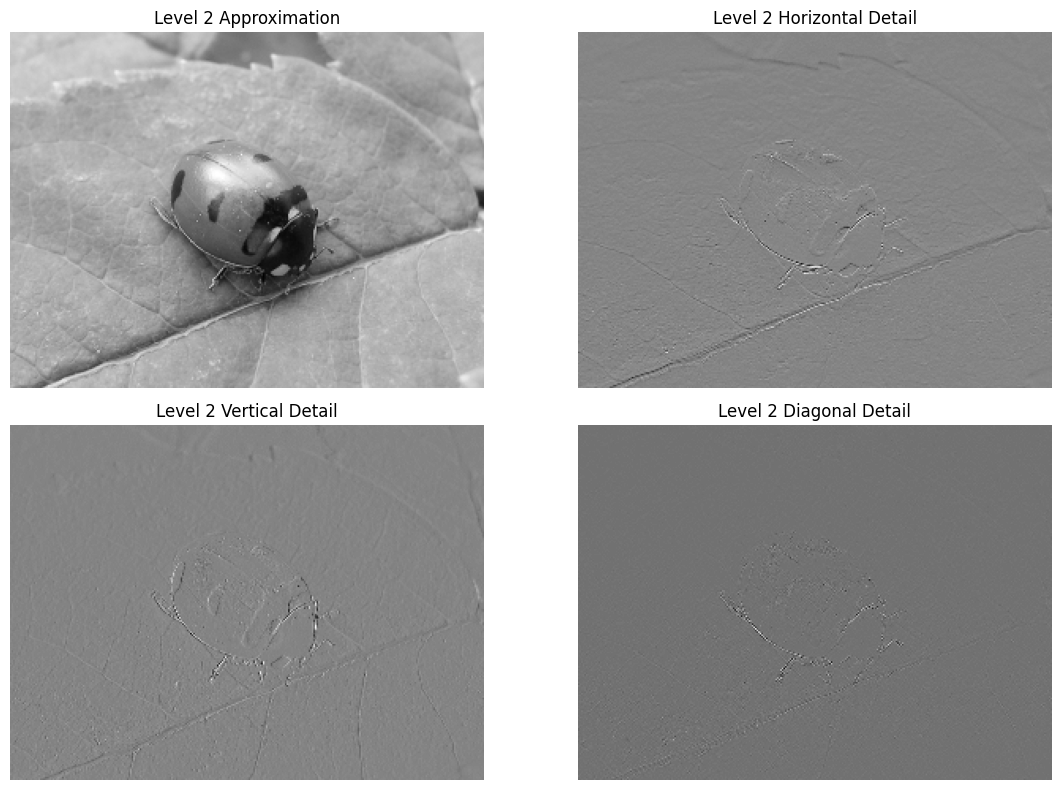

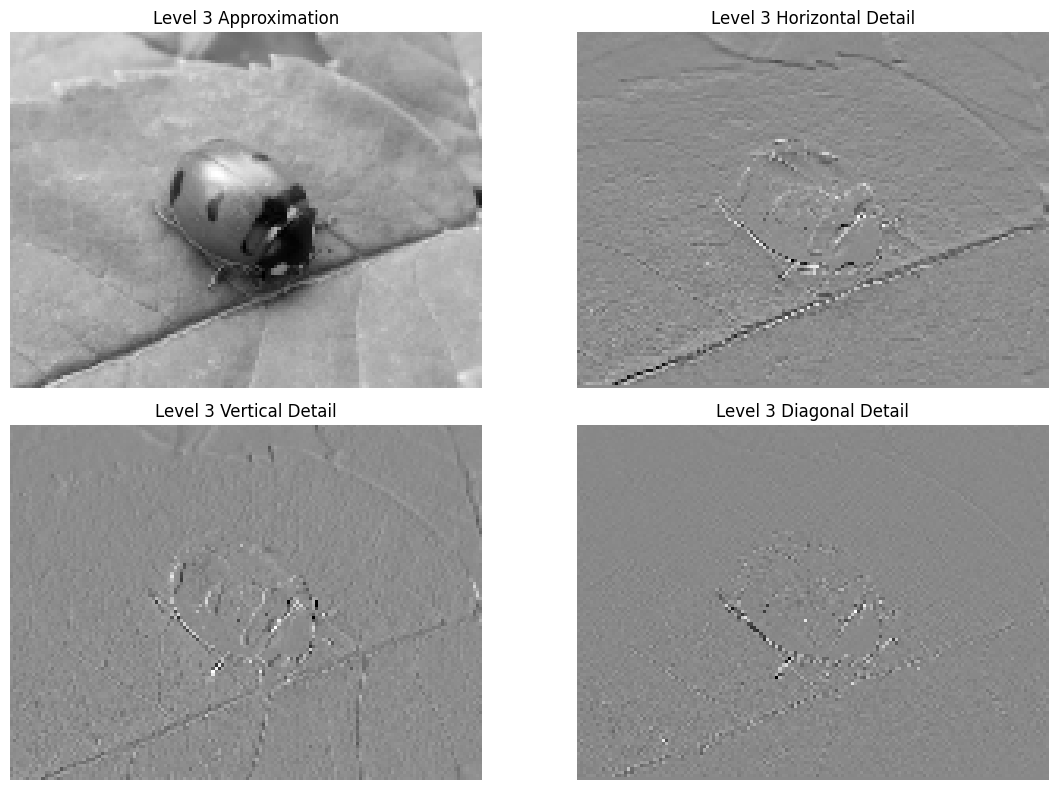

In [34]:
for i, (approx, details) in enumerate(zip(approximation_coeffs, detail_coeffs), 1):   #we will loop and print for each level on its own
    cH, cV, cD = details

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(approx, cmap='gray')
    plt.title(f"Level {i} Approximation")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(cH, cmap='gray')
    plt.title(f"Level {i} Horizontal Detail")
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(cV, cmap='gray')
    plt.title(f"Level {i} Vertical Detail")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(cD, cmap='gray')
    plt.title(f"Level {i} Diagonal Detail")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

5. Using your results in 1-4 as an example explain the following:

(a) What are the differences between the detail and the approximation coefficients?

Approximation coefficients capture the low frequency structure of the image. a blurred version containing overall intensity changes but fewer sharp edges. detail coefficients capture the high frequency information such as edges, textures, and small features. its clear to see from the examples I printed out. The bug is blurry in the approximation coefficient but in the detail coefficients you can see the lines clearly but not the image itself.

(b) What are the differences between the horizontal, vertical, or diagonal detail coefficients?

Each one of those coefficients captures the details along the lines (horizontal, vertical, or diagonal) these differences are rooted in how the wavelet filters separate the image high frequency content by direction.

(c) What are the differences between each level?

So in the first level we extract the largest details from the image and then we do it again but for the same picture with lower resolution and approximate again and now we get fewer details and so on. We reduce details as we go along and reduce the resolution, therefor the image looses more quality until we decide to stop. It is very clear from the bug picture that in each level the resolution gets worse as we extract more details from the picture.

Note: make sure to base your answers on the wavelet transform principles, how do they correspond
with your examples.